## NLP & Binary Classification: Toxic Comment Classification Challenge
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

** Dataset Information: **

- a large number of Wikipedia comments which have been labeled by human raters for toxic behavior 

** Attribute Information:**

- id	
- comment_text
- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate                

** Objective of this project **

- Identify and classify toxic online comments


# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
df = pd.read_csv('train.csv')
pd.set_option('display.max_colwidth', -1)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [3]:
df.comment_text.tail()

159566    ":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the ""most significant"" ones?   \n\n"
159567    You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page.  128.61.19.93                                                                                                                                                                                                    
159568    Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.                                                                                                                                                                                                                      
159569    And it looks like it was actually you who put on the speedy to hav

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [0]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

0    144277
1    15294 
Name: toxic, dtype: int64

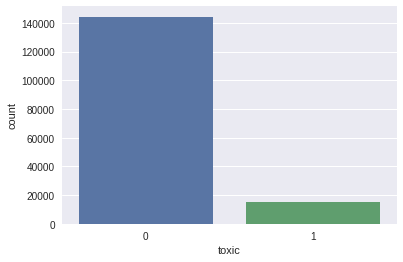

In [0]:
# inspect label --> only 'toxic' used in this analysis
sns.countplot(df['toxic'])
df['toxic'].value_counts() #imbalanced

In [0]:
# text length
df['text_length'] = df['comment_text'].apply(len)
df[['toxic','comment_text','text_length']].head()

,toxic,comment_text,text_length
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",264
1,0,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",112
2,0,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",233
3,0,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,622
4,0,"You, sir, are my hero. Any chance you remember what page that's on?",67


In [0]:
df['text_length'].describe()

count    159571.000000
mean     394.073221   
std      590.720282   
min      6.000000     
25%      96.000000    
50%      205.000000   
75%      435.000000   
max      5000.000000  
Name: text_length, dtype: float64

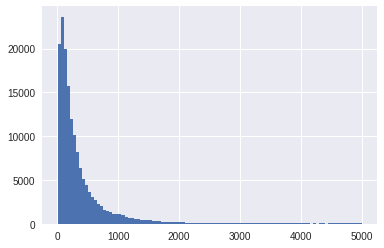

In [0]:
df['text_length'].hist(bins=100)

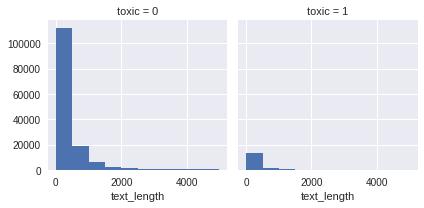

In [0]:
g = sns.FacetGrid(df,col='toxic')
g.map(plt.hist,'text_length')

(-100, 1100)

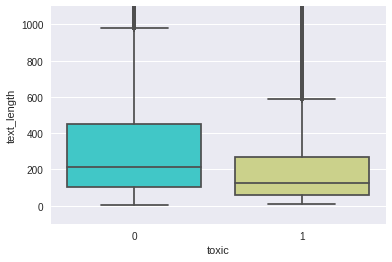

In [0]:
sns.boxplot(x='toxic',y='text_length',data=df,palette='rainbow')
plt.ylim([-100,1100])

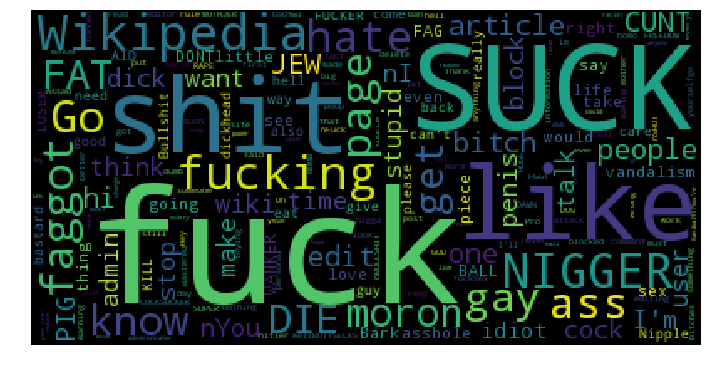

In [0]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = df[df['toxic']==1]['comment_text'].to_string()
wordcloud = WordCloud(
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english')),
    collocations=False).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Text Preprocessing

#### Create BoW

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

def get_train_test(X, y, test_size):
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size,stratify=y,random_state=seed)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
          
    #word vectorizer
    word_vect = TfidfVectorizer(
        strip_accents='unicode',
        stop_words='english',
        analyzer='word',
        token_pattern=r'\w{1,}',
        ngram_range=(1,1),
        sublinear_tf=True,
        max_features=10000)
    X_train_word = word_vect.fit_transform(X_train)
    X_test_word = word_vect.transform(X_test)
    print(X_train_word.shape, X_test_word.shape)

    # Character vectorizer
    char_vect = TfidfVectorizer(
        strip_accents='unicode',
        stop_words='english',
        analyzer='char',
        ngram_range=(2,6),
        sublinear_tf=True,
        max_features=50000)
    X_train_char = char_vect.fit_transform(X_train)
    X_test_char = char_vect.transform(X_test)
    print(X_train_char.shape, X_test_char.shape)
        
    #word + char  
    X_train = hstack([X_train_char, X_train_word])
    X_test = hstack([X_test_char, X_test_word])
    print(X_train.shape, X_test.shape)          
    
    return X_train, X_test, y_train, y_test

#### Spilt Train Test sets

In [5]:
df = df[['comment_text','toxic']]
#df.head()

In [6]:
seed = 101
np.random.seed(seed)

X = df['comment_text']
y = df['toxic'].values
test_size = 0.2

X_train, X_test, y_train, y_test = get_train_test(X, y, test_size)

(127656,) (31915,) (127656,) (31915,)
(127656, 10000) (31915, 10000)
(127656, 50000) (31915, 50000)
(127656, 60000) (31915, 60000)


# Model Train & Evaluation

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score

def model_eval(X, y_true):
    #accuracy score
    y_pred = model.predict(X)
    print('Accuracy: {:0.1f}%'.format(accuracy_score(y_true,y_pred)*100))
    print('roc_auc: {:0.3f}'.format(roc_auc_score(y_true,y_pred)))

    #classification report
    print('\n')
    print(classification_report(y_true,y_pred))

    #confusion matrix
    confmat = confusion_matrix(y_true,y_pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

#### Model1: Logistic Regression

Accuracy: 97.0%
roc_auc: 0.863


             precision    recall  f1-score   support

          0       0.97      1.00      0.98    115421
          1       0.94      0.73      0.82     12235

avg / total       0.97      0.97      0.97    127656



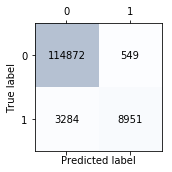

In [8]:
# train model
model = LogisticRegression()
model.fit(X_train,y_train)
model_eval(X_train,y_train)

Accuracy: 96.5%
roc_auc: 0.846


             precision    recall  f1-score   support

          0       0.97      0.99      0.98     28856
          1       0.91      0.70      0.79      3059

avg / total       0.96      0.96      0.96     31915



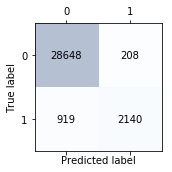

In [9]:
# evaluate model with test set
model_eval(X_test,y_test)

#### Model 2: Random Forest

Accuracy: 99.4%
roc_auc: 0.972


             precision    recall  f1-score   support

          0       0.99      1.00      1.00    115421
          1       1.00      0.94      0.97     12235

avg / total       0.99      0.99      0.99    127656



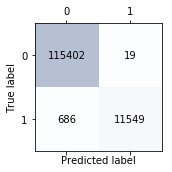

In [11]:
# train model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)
model_eval(X_train, y_train)

Accuracy: 95.3%
roc_auc: 0.779


             precision    recall  f1-score   support

          0       0.96      0.99      0.97     28856
          1       0.91      0.56      0.70      3059

avg / total       0.95      0.95      0.95     31915



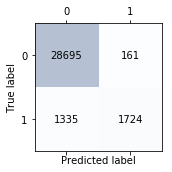

In [12]:
# evaluate model with test set
model_eval(X_test,y_test)

#### Model 3: Naive Bayes

Accuracy: 93.9%
roc_auc: 0.883


             precision    recall  f1-score   support

          0       0.98      0.95      0.97    115421
          1       0.64      0.81      0.72     12235

avg / total       0.95      0.94      0.94    127656



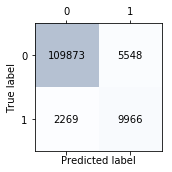

In [14]:
# train model
model = MultinomialNB()
model.fit(X_train, y_train)
model_eval(X_train, y_train)

Accuracy: 93.9%
roc_auc: 0.882


             precision    recall  f1-score   support

          0       0.98      0.95      0.97     28856
          1       0.64      0.81      0.72      3059

avg / total       0.95      0.94      0.94     31915



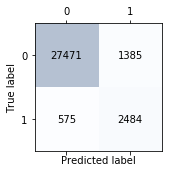

In [15]:
# evaluate model with test set
model_eval(X_test,y_test)